In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.models import load_model

#provide directory for mnist_cnn_99.h5 file
model = load_model('mnist_cnn_99.h5')

In [26]:

def process_image(img):
    
    print("Original Image")
    plt.imshow(img)
    plt.show()
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print("Grayscale")
    plt.imshow(img,cmap='gray')
    plt.show()
    
    _, mask = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY_INV)
    kernal = np.ones((7,7), np.uint8)
    
    proc = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal)
    print("Morph Open")
    plt.imshow(proc)
    plt.show()
    
    """
    proc = cv2.morphologyEx(proc, cv2.MORPH_OPEN, kernal)
    proc = cv2.dilate(proc, kernal, iterations=2)
    print("Dilate")
    plt.imshow(proc)
    plt.show()
    """
    
    proc = cv2.GaussianBlur(proc, (9, 9), 0)
    print("Blurred")
    plt.imshow(proc,cmap='gray')
    plt.show()
    
    
    
    proc = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    print("cleaned")
    plt.imshow(proc,cmap='gray')
    plt.show()
    
    proc = ~proc
    print("inverted")
    plt.imshow(proc,cmap='gray')
    plt.show()
    
    
    """
    closing = cv2.morphologyEx(proc, cv2.MORPH_CLOSE, kernal)
    print("Morph Close")
    plt.imshow(closing)
    plt.show()
    """
    proc = cv2.resize(proc,(28,28))
    print("resized")
    plt.imshow(proc,cmap='gray')
    plt.show()
    
    img_array = proc.reshape(1, 28, 28, 1)
    
    return img_array


In [27]:
def get_number(image):
    
    image_array = process_image(image)
    pred = model.predict(image_array)
    #print("Predicted Number is",pred.argmax())
    
    return pred.argmax()

Original Image


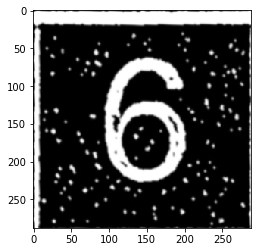

Grayscale


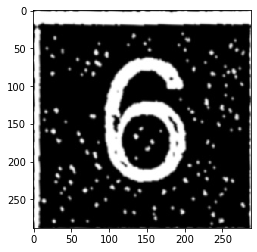

Morph Open


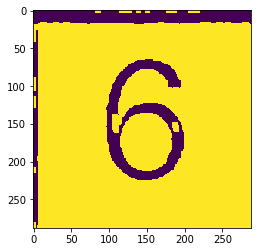

Blurred


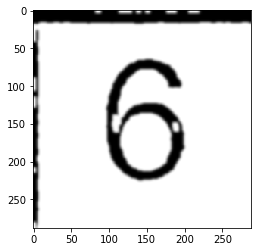

cleaned


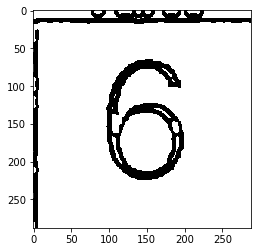

inverted


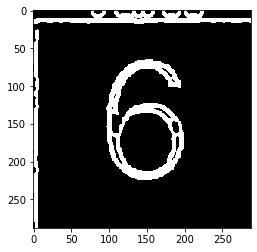

resized


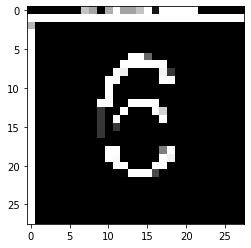

5

In [28]:
#read image stored on device by providing complete address of image
image = cv2.imread('6.jpg')
get_number(image)

In [31]:
"""
def process_image(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
    proc = cv2.GaussianBlur(img.copy(), (9, 9), 0)
    
    proc = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    proc = ~proc
    
    proc = cv2.resize(proc,(28,28))
    
    img_array = proc.reshape(1, 28, 28, 1)
    
    return img_array
    
"""

'\ndef process_image(img):\n    \n    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n   \n    proc = cv2.GaussianBlur(img.copy(), (9, 9), 0)\n    \n    proc = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)\n    \n    proc = ~proc\n    \n    proc = cv2.resize(proc,(28,28))\n    \n    img_array = proc.reshape(1, 28, 28, 1)\n    \n    return img_array\n    \n'